In [27]:
# %load_ext cudf.pandas
import polars as pl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [80]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# TODO: delete this
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

df = train_df.copy()


In [36]:
train_df.describe()

,Basic_Demos-Age,Basic_Demos-Sex,CGAS-CGAS_Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,Physical-Systolic_BP,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,2954.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,116.983074,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,17.061225,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,107.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,114.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,125.000000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,203.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


# Exploratory Data Analysis

### Severity Impairment Index
First, we'll look at the distribution of `sii` data

In [72]:
sii_data = train_df['sii'].value_counts().reset_index()
sii_data.columns = ['sii_label', 'count']
sii_data['percent_of_total'] = round((sii_data['count'] / len(train_df)) * 100,1)
sii_data
print(f"{sii_data}\n")
print(f"{100.0*train_df['sii'].isnull().sum()/len(train_df):.2f}% of the sii data is null")

   sii_label  count  percent_of_total
0        0.0   1594              40.3
1        1.0    730              18.4
2        2.0    378               9.5
3        3.0     34               0.9

30.91% of the sii data is null


### Demographics
Let's look through the data related to demographics

In [89]:
df['Basic_Demos-Sex'].value_counts()

Basic_Demos-Sex
0    2484
1    1476
Name: count, dtype: int64

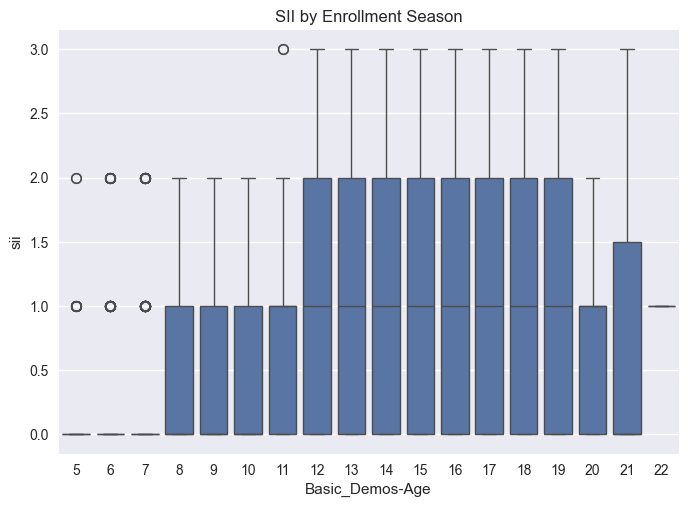

In [ ]:
sns.boxplot(x='Basic_Demos-Age', y='sii', data=train_df)
plt.title('SII by Enrollment Season')

plt.show()

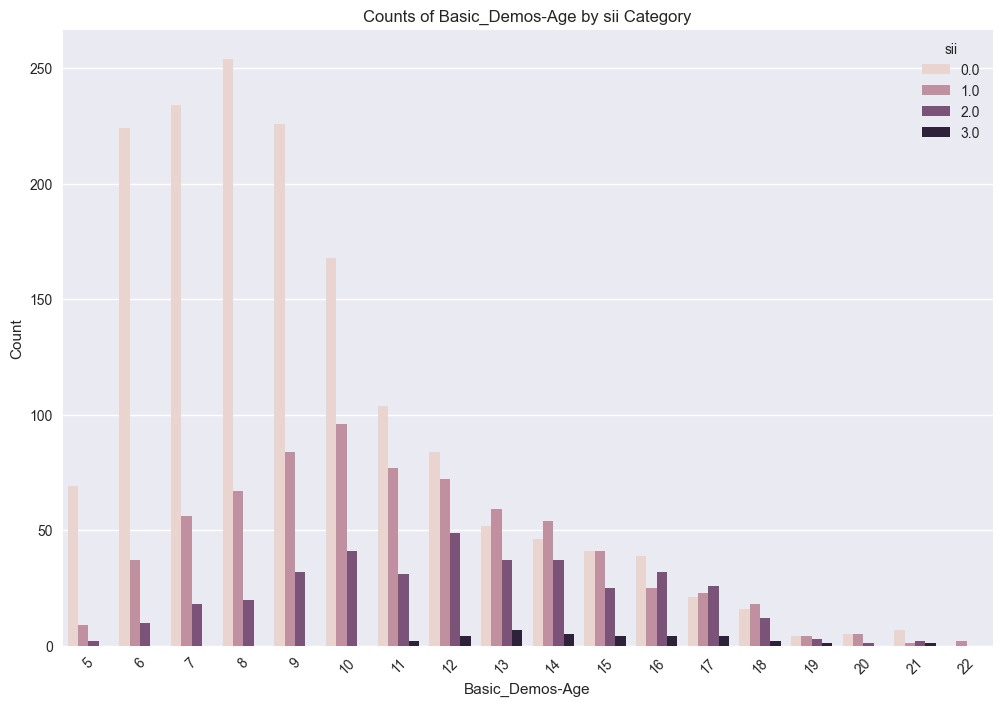

In [109]:
age_sii_counts = train_df.groupby(['Basic_Demos-Age', 'sii']).size().reset_index(name='count')
plt.figure(figsize=(12, 8))
sns.barplot(data=age_sii_counts, x='Basic_Demos-Age', y='count', hue='sii')
plt.title('Counts of Basic_Demos-Age by sii Category')
plt.xlabel('Basic_Demos-Age')
plt.ylabel('Count')
plt.legend(title='sii')
plt.xticks(rotation=45)
plt.show()

Here's what we learned:
* We learned that our dataset is mostly males, about 63% male to 37% female
* Also, the interquartile range of `sii` increases with older ages. 
* Younger ages are prone to less severe impairment
* The magnitude of the severity changes based on the age in consideration. E.g.
    * 0 risk - 8 yrs old
    * 1 risk - 10 yrs old
    * 2 risk - 12 yrs old
    * 3 risk - 13 yrs old

Not shown:
* No trend between `Basic_Demos-Enroll_Season` and `sii`

### Children's Global Assessment Scale


In [5]:
columns_not_in_test = set(train_df.columns) - set(test_df.columns)
columns_not_in_test

{'PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_Total',
 'PCIAT-Season',
 'sii'}

distribution of sii data
sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

30.91% of the sii data is null


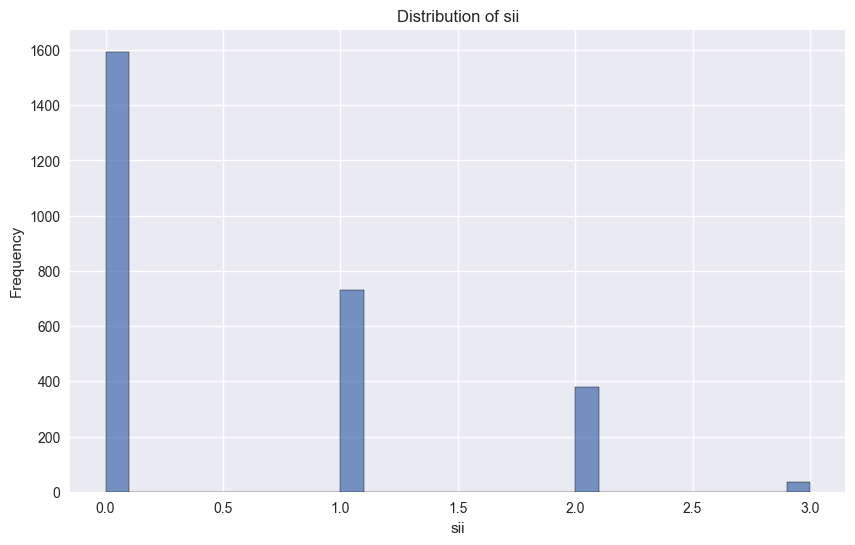

sii
0.0    1594
1.0     730
2.0     378
3.0      34
Name: count, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(train_df['sii'], bins=30)
plt.title('Distribution of sii')
plt.xlabel('sii')
plt.ylabel('Frequency')
plt.show()


The test set does not have any of the PCIAT data, and we're missing about 30% of the `sii` label in the training data. 

In [7]:
pciat_aggs = train_df.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max', 'mean'])
pciat_aggs = pciat_aggs.rename(
    columns={'min': 'Minimum PCIAT total Score', 'max': 'Maximum total PCIAT Score', 'mean': 'Average total PCIAT Score'}
)
pciat_aggs

,Minimum PCIAT total Score,Maximum total PCIAT Score,Average total PCIAT Score
sii,,,
0.0,0.0,30.0,13.929737
1.0,31.0,49.0,38.726027
2.0,50.0,79.0,60.658730
3.0,80.0,93.0,85.911765


The sum of the PCIAT scores all align with the classification set by the Severity Impairment Index (sii)

In [9]:
# List all columns that are of the form PCIAT-PCIAT_XX
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]

# Check if the sum of all PCIAT columns is equal to the PCIAT-PCIAT_Total column. Handle nulls with fillna(0)
train_df['PCIAT_summed_total'] = train_df[pciat_columns].fillna(0).sum(axis=1)
is_calculated_sum_equal_to_total_column = train_df['PCIAT_summed_total'] == train_df['PCIAT-PCIAT_Total'].fillna(0)
is_calculated_sum_equal_to_total_column.sum() == len(train_df)

np.True_

The number of instances where PCIAT-PCIAT_1 -> PCIAT-PCIAT_20 is equal to PCIAT-PCIAT_Total is equal to the number of records in the dataset. This shows that PCIAT-PCIAT_Total is 100% is a linear transformation of other features in this dataset, so we can drop it from the dataset

In [10]:
train_df.drop(columns=['PCIAT_summed_total'], inplace=True)

We use KNN to impute the missing data of all numeric columns, including `sii` (which we need to round to the nearest integer)

In [24]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
imputer = KNNImputer(n_neighbors=5)
train[numeric_cols] = imputer.fit_transform(train[numeric_cols])

# Round 'sii' to the nearest integer
train['sii'] = train['sii'].round().astype(int).clip(upper=3)
train


,id,Basic_Demos-Enroll_Season,Basic_Demos-Age,Basic_Demos-Sex,CGAS-Season,CGAS-CGAS_Score,Physical-Season,Physical-BMI,Physical-Height,Physical-Weight,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,00008ff9,Fall,5.0,0.0,Winter,51.0,Fall,16.877316,46.00,50.80,...,4.0,2.0,4.0,55.0,NaN,48.4,62.2,Fall,3.0,2
1,000fd460,Summer,9.0,0.0,NaN,70.0,Fall,14.035590,48.00,46.00,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0
2,00105258,Summer,10.0,1.0,Fall,71.0,Fall,16.648696,56.50,75.60,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0
3,00115b9f,Winter,9.0,0.0,Fall,71.0,Summer,18.292347,56.00,81.60,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1
4,0016bb22,Spring,18.0,1.0,Summer,73.2,NaN,24.695872,63.69,148.16,...,1.6,1.6,0.8,51.6,NaN,42.8,59.2,NaN,2.4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3955,ff8a2de4,Fall,13.0,0.0,Spring,60.0,Fall,16.362460,59.50,82.40,...,1.0,1.0,0.0,32.0,Winter,35.0,50.0,Fall,1.0,1
3956,ffa9794a,Winter,10.0,0.0,NaN,58.6,Spring,18.764678,53.50,76.40,...,0.8,0.8,0.4,22.4,NaN,38.6,54.8,Winter,0.0,0
3957,ffcd4dbd,Fall,11.0,0.0,Spring,68.0,Winter,21.441500,60.00,109.80,...,1.0,0.0,1.0,31.0,Winter,56.0,77.0,Fall,0.0,1
3958,ffed1dd5,Spring,13.0,0.0,Spring,70.0,Winter,12.235895,70.70,87.00,...,1.0,1.0,1.0,19.0,Spring,33.0,47.0,Spring,1.0,0


# Exploratory Data Analysis

In [320]:
# train_df[['BIA-BIA_FFM','BIA-BIA_SMM']].corr()
columns_to_exclude = train_df.columns[train_df.columns.str.contains('PCIAT', case=False)]
df_excluded = train_df.drop(columns=columns_to_exclude, axis=1)


correlation_matrix = df_excluded.select_dtypes(include=['float64','int64'])[['Basic_Demos-Age','Basic_Demos-Sex','Physical-BMI','Physical-Waist_Circumference']].corr()
correlation_matrix

# df_excluded = df_excluded[['Basic_Demos-Age','Basic_Demos-Sex','CGAS-CGAS_Score','Physical-BMI']]
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', cbar=True)
# plt.title("Correlation Heatmap")
# plt.show()



,Basic_Demos-Age,Basic_Demos-Sex,Physical-BMI,Physical-Waist_Circumference
Basic_Demos-Age,1.000000,0.064004,0.492112,0.609601
Basic_Demos-Sex,0.064004,1.000000,0.025793,-0.020013
Physical-BMI,0.492112,0.025793,1.000000,0.892149
Physical-Waist_Circumference,0.609601,-0.020013,0.892149,1.000000


In [26]:
# TODO: Explore more heat maps. Remove sii from the correlation matrix
# also, maybe remove columns that are largely null
# df_excluded.select_dtypes(include=['float64','int64'])

In [25]:
# Add things things in later
target_labels = ['None','Mild','Moderate','Severe']